# Hephaestus Minicubes Sample
This is a demonstration of the *Hephaestus Minicubes* dataset structure and utilities.

## Install dependencies

In [ ]:
# Install dependencies
!pip install --upgrade xarray zarr fsspec numcodecs

import requests
import tarfile
import xarray as xr
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Download and decompress a sample minicube

In [ ]:
# Step 1: Download from Dropbox
sample_minicube_url = "https://www.dropbox.com/scl/fi/ftekfu3tyu9htga2i8tt5/106A_09090_000404.zarr.tar?rlkey=voff6lyt1b8ha2hikloyivmpt&st=j1ih7htr&dl=1"
tar_path = Path("sample.zarr.tar")

print("Downloading datacube. This might take a while...")
with requests.get(sample_minicube_url, stream=True) as r:
    r.raise_for_status()
    with open(tar_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print("Download complete.")

# Step 2: Extract the .tar file
extract_dir = Path("sample")
print(f"Extracting to {extract_dir}/...")
with tarfile.open(tar_path) as tar:
    tar.extractall(path=extract_dir)

print("Extraction complete.")


Download complete.
Extracting to sample.zarr/...
Extraction complete.


## 2. Examining the minicube


In [ ]:
# Step 3: Load with xarray as Zarr
print("Loading datacube with xarray...")
zarr_path = Path(extract_dir, "106A_09090_000404.zarr")
ds = xr.open_zarr(zarr_path)
ds

Loading datacube with xarray...


<xarray.Dataset> Size: 2TB
Dimensions:                                          (primary_date: 190,
                                                      secondary_date: 192,
                                                      latitude: 1070,
                                                      longitude: 1409)
Coordinates:
  * latitude                                         (latitude) float64 9kB -...
  * longitude                                        (longitude) float64 11kB ...
  * primary_date                                     (primary_date) datetime64[ns] 2kB ...
  * secondary_date                                   (secondary_date) datetime64[ns] 2kB ...
Data variables: (12/26)
    activity_type_mask                               (primary_date, secondary_date, latitude, longitude) int32 220GB dask.array<chunksize=(1, 1, 1070, 1409), meta=np.ndarray>
    atmospheric_fringes                              (primary_date, secondary_date) int32 146kB dask.array<chunksize=(1, 1), meta=np.ndarray>
    caption                                          (primary_date, secondary_date) <U572 83MB dask.array<chunksize=(1, 1), meta=np.ndarray>
    confidence                                       (primary_date, secondary_date) float32 146kB dask.array<chunksize=(1, 1), meta=np.ndarray>
    corrupted                                        (primary_date, secondary_date) bool 36kB dask.array<chunksize=(1, 1), meta=np.ndarray>
    deformation_mask                                 (primary_date, secondary_date, latitude, longitude) int32 220GB dask.array<chunksize=(1, 1, 1070, 1409), meta=np.ndarray>
    ...                                               ...
    secondary_date_surface_pressure                  (primary_date, secondary_date, latitude, longitude) float32 220GB dask.array<chunksize=(1, 1, 1070, 1409), meta=np.ndarray>
    secondary_date_total_column_water_vapour         (primary_date, secondary_date, latitude, longitude) float32 220GB dask.array<chunksize=(1, 1, 1070, 1409), meta=np.ndarray>
    secondary_date_vertical_integral_of_temperature  (primary_date, secondary_date, latitude, longitude) float32 220GB dask.array<chunksize=(1, 1, 1070, 1409), meta=np.ndarray>
    spatial_ref                                      int64 8B ...
    unique_id                                        (primary_date, secondary_date) <U10 1MB dask.array<chunksize=(1, 1), meta=np.ndarray>
    valid_date_pair                                  (primary_date, secondary_date) bool 36kB dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes:
    description:  The Hephaestus Minicubes are a collection of scientific dat...
    frame_id:     106A_09090_000404
    title:        Hephaestus Minicubes: A Global Multi-Modal Dataset for Volc...

## 3. Datacube utilities
Examine what InSAR products are available with a certain primary_date acquisition.

In [ ]:
primary_date_ds = ds.isel(primary_date=6)
print(f"Selected primary acquisition date: {primary_date_ds.primary_date.values}")

valid_insar = primary_date_ds.sel(secondary_date=primary_date_ds.valid_date_pair)
print("\nNow we have selected the portion of the datacube with all the available InSAR products for this primary date:")
valid_insar

Selected primary acquisition date: 2017-03-19T00:00:00.000000000

Now we have selected the portion of the datacube with all the available InSAR products for this primary date:


<xarray.Dataset> Size: 205MB
Dimensions:                                          (secondary_date: 3,
                                                      latitude: 1070,
                                                      longitude: 1409)
Coordinates:
  * latitude                                         (latitude) float64 9kB -...
  * longitude                                        (longitude) float64 11kB ...
    primary_date                                     datetime64[ns] 8B 2017-0...
  * secondary_date                                   (secondary_date) datetime64[ns] 24B ...
Data variables: (12/26)
    activity_type_mask                               (secondary_date, latitude, longitude) int32 18MB dask.array<chunksize=(1, 1070, 1409), meta=np.ndarray>
    atmospheric_fringes                              (secondary_date) int32 12B dask.array<chunksize=(1,), meta=np.ndarray>
    caption                                          (secondary_date) <U572 7kB dask.array<chunksize=(1,), meta=np.ndarray>
    confidence                                       (secondary_date) float32 12B dask.array<chunksize=(1,), meta=np.ndarray>
    corrupted                                        (secondary_date) bool 3B dask.array<chunksize=(1,), meta=np.ndarray>
    deformation_mask                                 (secondary_date, latitude, longitude) int32 18MB dask.array<chunksize=(1, 1070, 1409), meta=np.ndarray>
    ...                                               ...
    secondary_date_surface_pressure                  (secondary_date, latitude, longitude) float32 18MB dask.array<chunksize=(1, 1070, 1409), meta=np.ndarray>
    secondary_date_total_column_water_vapour         (secondary_date, latitude, longitude) float32 18MB dask.array<chunksize=(1, 1070, 1409), meta=np.ndarray>
    secondary_date_vertical_integral_of_temperature  (secondary_date, latitude, longitude) float32 18MB dask.array<chunksize=(1, 1070, 1409), meta=np.ndarray>
    spatial_ref                                      int64 8B ...
    unique_id                                        (secondary_date) <U10 120B dask.array<chunksize=(1,), meta=np.ndarray>
    valid_date_pair                                  (secondary_date) bool 3B dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    description:  The Hephaestus Minicubes are a collection of scientific dat...
    frame_id:     106A_09090_000404
    title:        Hephaestus Minicubes: A Global Multi-Modal Dataset for Volc...

## Example visualizations
We can examine the time-series of available insar_phase_difference products:

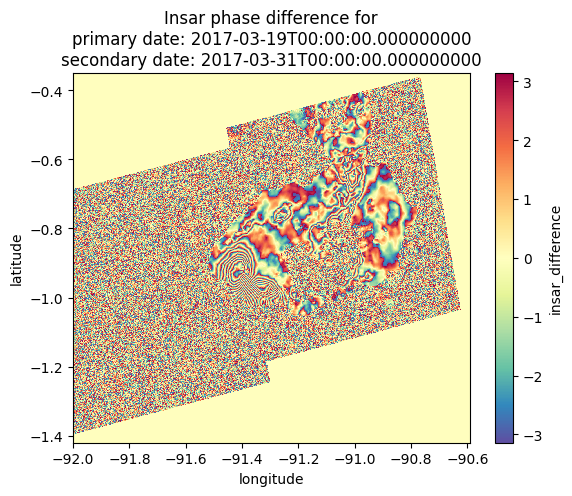

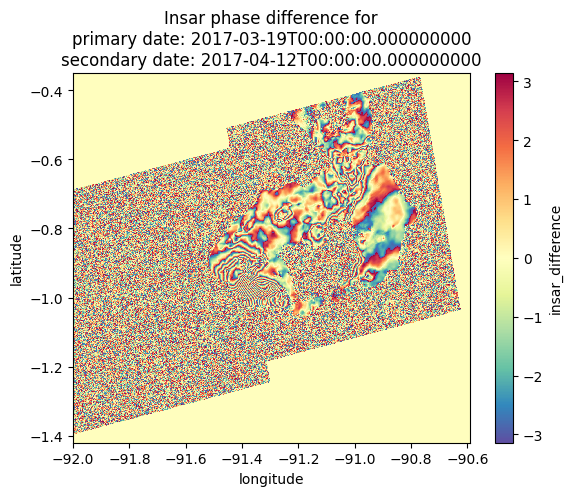

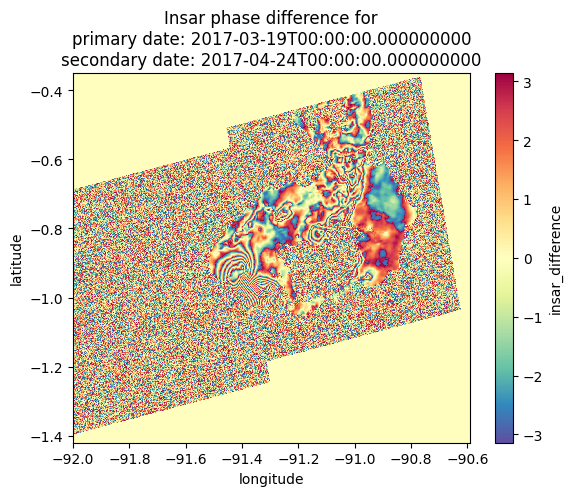

In [ ]:
colormap = sns.color_palette("Spectral_r", as_cmap=True)

for s_date in valid_insar.secondary_date.values:
    plt.figure()
    da = valid_insar.sel(secondary_date=s_date).insar_difference
    im = da.plot(cmap=colormap)
    plt.title(
        f"Insar phase difference for\nprimary date: {valid_insar.primary_date.values}\nsecondary date: {s_date}"
    )
    plt.show()


## Examine deformation
We use the grayscale colormap for better label visibility.

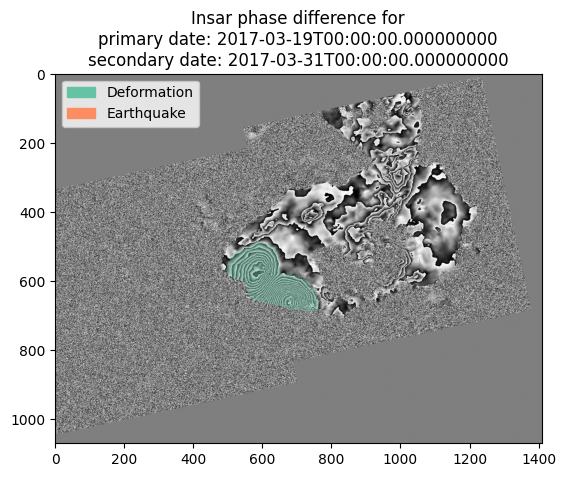

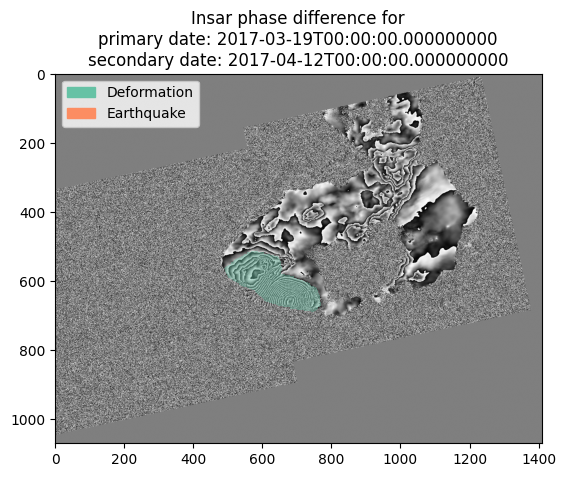

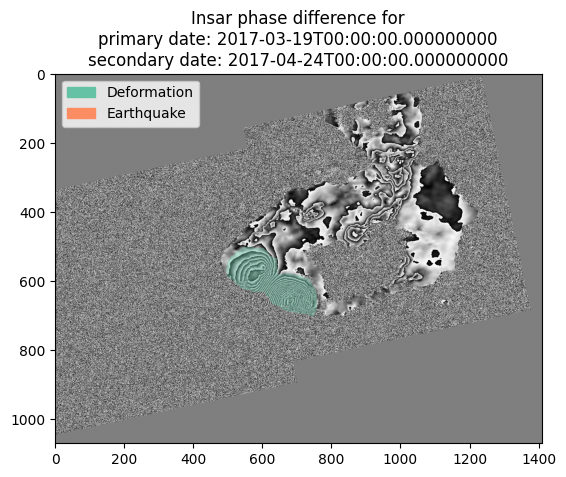

In [ ]:
import matplotlib.patches as mpatches

colormap = 'gray'
viridis_cmap = sns.color_palette("Set2")
# Define labels and colors for your mask categories
activity_legend = {
    1: ("Deformation", viridis_cmap[0]),
    2: ("Earthquake", viridis_cmap[1])
    # Add more if needed, with distinct colors
}

for s_date in valid_insar.secondary_date.values:
    plt.figure()

    # Select the insar_difference DataArray for this secondary date
    da = valid_insar.sel(secondary_date=s_date).insar_difference

    # Plot insar_difference first
    plt.imshow(da, cmap=colormap)

    # Select the mask data for this secondary date
    mask_data = valid_insar.sel(secondary_date=s_date).deformation_mask

    # Create a masked array, masking out zeros (no activity)
    masked_mask = np.ma.masked_where(mask_data == 0, mask_data)

    # Overlay mask with categorical colors, alpha=0.4
    # We'll map each category to its color manually:
    color_mask = np.zeros((*masked_mask.shape, 4))  # RGBA array

    for val, (label, color) in activity_legend.items():
        # Create boolean mask for this val
        mask_bool = (masked_mask == val)

        # Convert color name to RGBA
        rgba = plt.cm.colors.to_rgba(color, alpha=0.4)

        # Assign color to those positions
        color_mask[mask_bool] = rgba

    plt.imshow(
        color_mask,
        interpolation='none',
        origin='upper',
    )

    plt.title(
        f"Insar phase difference for\nprimary date: {valid_insar.primary_date.values}\nsecondary date: {s_date}"
    )

    # Create legend handles
    handles = [mpatches.Patch(color=col, label=lbl) for _, (lbl, col) in activity_legend.items()]
    plt.legend(handles=handles, loc='upper left')

    plt.show()


## Examine specific activity types and intensity

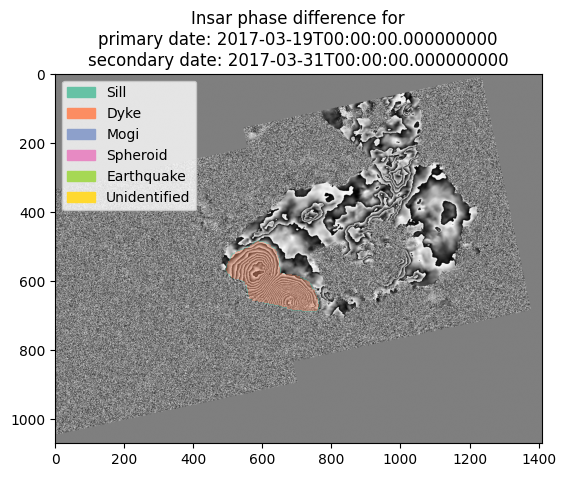

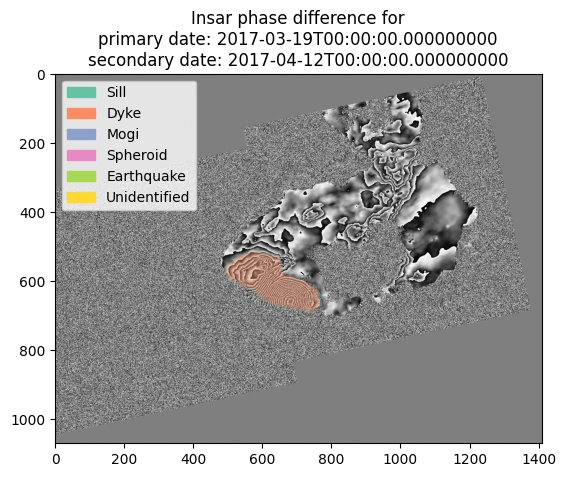

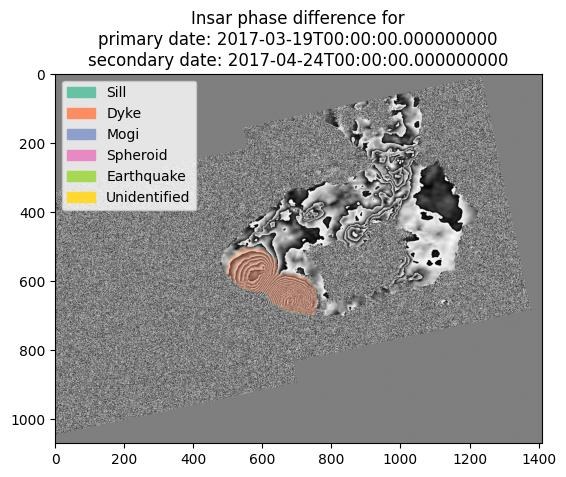

In [ ]:
import matplotlib.patches as mpatches
viridis_cmap = sns.color_palette("Set2")
# Define labels and colors for your mask categories
activity_legend = {
    1: ("Sill", viridis_cmap[0]),
    2: ("Dyke", viridis_cmap[1]),
    3: ("Mogi", viridis_cmap[2]),
    4: ("Spheroid", viridis_cmap[3]),
    5: ("Earthquake", viridis_cmap[4]),
    6: ("Unidentified", viridis_cmap[5])
    }

for s_date in valid_insar.secondary_date.values:
    plt.figure()

    # Select the insar_difference DataArray for this secondary date
    da = valid_insar.sel(secondary_date=s_date).insar_difference

    # Plot insar_difference first
    plt.imshow(da, cmap=colormap)

    # Select the mask data for this secondary date
    mask_data = valid_insar.sel(secondary_date=s_date).activity_type_mask

    # Create a masked array, masking out zeros (no activity)
    masked_mask = np.ma.masked_where(mask_data == 0, mask_data)

    # Overlay mask with categorical colors, alpha=0.4
    # We'll map each category to its color manually:
    color_mask = np.zeros((*masked_mask.shape, 4))  # RGBA array

    for val, (label, color) in activity_legend.items():
        # Create boolean mask for this val
        mask_bool = (masked_mask == val)

        # Convert color name to RGBA
        rgba = plt.cm.colors.to_rgba(color, alpha=0.4)

        # Assign color to those positions
        color_mask[mask_bool] = rgba

    plt.imshow(
        color_mask,
        interpolation='none',
        origin='upper',
    )

    plt.title(
        f"Insar phase difference for\nprimary date: {valid_insar.primary_date.values}\nsecondary date: {s_date}"
    )

    # Create legend handles
    handles = [mpatches.Patch(color=col, label=lbl) for _, (lbl, col) in activity_legend.items()]
    plt.legend(handles=handles, loc='upper left')

    plt.show()


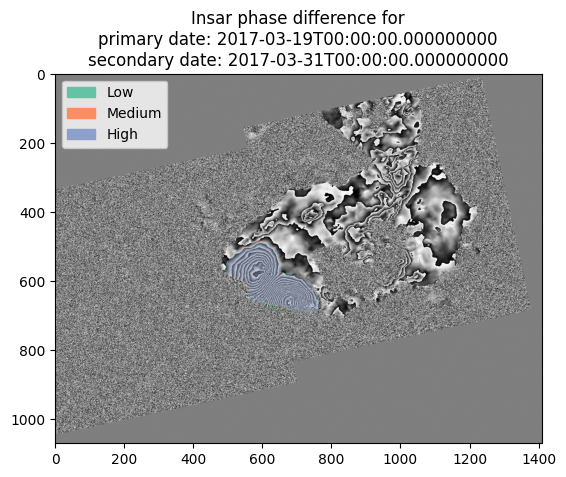

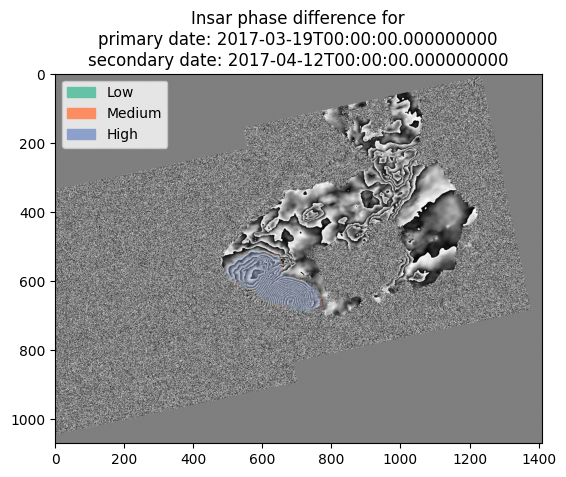

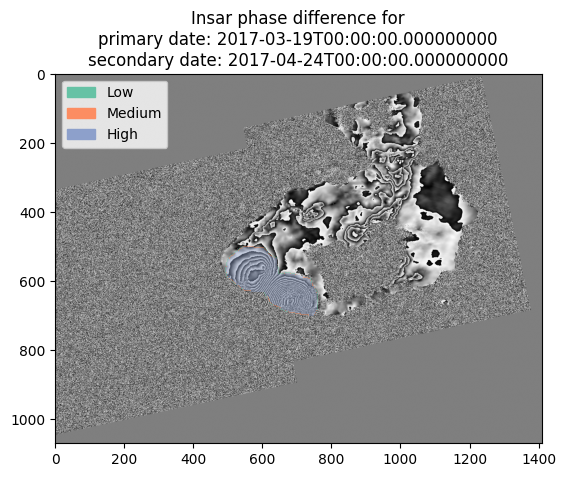

In [ ]:
import matplotlib.patches as mpatches
viridis_cmap = sns.color_palette("Set2")
# Define labels and colors for your mask categories
activity_legend = {
    1: ("Low", viridis_cmap[0]),
    2: ("Medium", viridis_cmap[1]),
    3: ("High", viridis_cmap[2])
    }

for s_date in valid_insar.secondary_date.values:
    plt.figure()

    # Select the insar_difference DataArray for this secondary date
    da = valid_insar.sel(secondary_date=s_date).insar_difference

    # Plot insar_difference first
    plt.imshow(da, cmap=colormap)

    # Select the mask data for this secondary date
    mask_data = valid_insar.sel(secondary_date=s_date).intensity_level_mask

    # Create a masked array, masking out zeros (no activity)
    masked_mask = np.ma.masked_where(mask_data == 0, mask_data)

    # Overlay mask with categorical colors, alpha=0.4
    # We'll map each category to its color manually:
    color_mask = np.zeros((*masked_mask.shape, 4))  # RGBA array

    for val, (label, color) in activity_legend.items():
        # Create boolean mask for this val
        mask_bool = (masked_mask == val)

        # Convert color name to RGBA
        rgba = plt.cm.colors.to_rgba(color, alpha=0.4)

        # Assign color to those positions
        color_mask[mask_bool] = rgba

    plt.imshow(
        color_mask,
        interpolation='none',
        origin='upper',
    )

    plt.title(
        f"Insar phase difference for\nprimary date: {valid_insar.primary_date.values}\nsecondary date: {s_date}"
    )

    # Create legend handles
    handles = [mpatches.Patch(color=col, label=lbl) for _, (lbl, col) in activity_legend.items()]
    plt.legend(handles=handles, loc='upper left')

    plt.show()


## Examine Atmospheric State
The atmospheric component is in general correlated with topography, hence exhibiting a similar pattern across time. However the difference in lateral variation can introduce delays to the InSAR signal and are relevant to atmospheric correction processes.

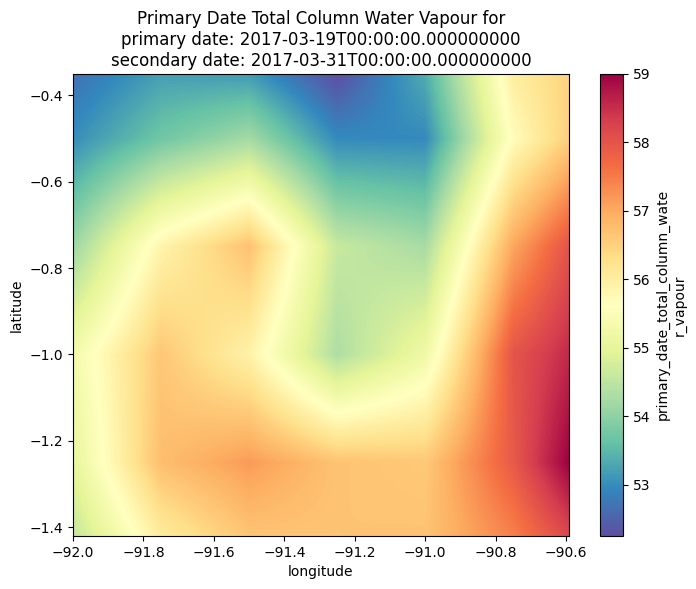

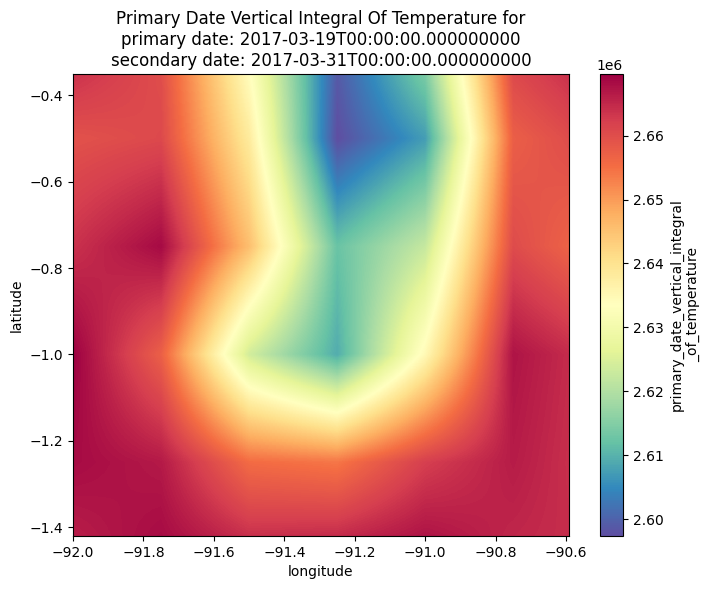

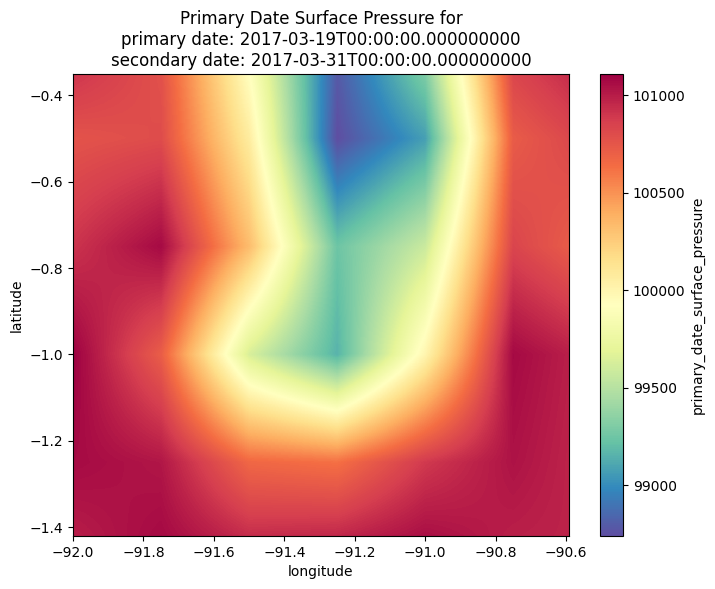

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = sns.color_palette("Spectral_r", as_cmap=True)

# Pick the first secondary_date for demonstration
s_date = valid_insar.secondary_date.values[0]

# Access the dataset for this secondary_date
ds = valid_insar.isel(secondary_date=0)

# Define variables to plot
variables = [
    "primary_date_total_column_water_vapour",
    "primary_date_vertical_integral_of_temperature",
    "primary_date_surface_pressure"
]

# Plot each variable
for var in variables:
    da = ds[var]
    plt.figure(figsize=(8, 6))
    im = da.plot(cmap=colormap)
    plt.title(
        f"{var.replace('_', ' ').title()} for\nprimary date: {valid_insar.primary_date.values}\nsecondary date: {s_date}"
    )
    plt.show()
